In [39]:
# Import all required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# List all files in the current directory
os.listdir()

['.ipynb_checkpoints',
 'GPU bench mark with classification.ipynb',
 'Gradient descent.ipynb',
 'homeprices_banglore.csv',
 'Insurance data.xlsx',
 'Losses.ipynb',
 'sd vs bd vs mbd.ipynb',
 'Simple neural network.ipynb',
 'Untitled.ipynb',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [41]:
# Reading data by using pandas
pd.set_option('display.max_columns', None) # Displays all columns in the data frame
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
# Dropping unwanted columns
data.drop('customerID', axis=1, inplace=True)

In [43]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [44]:
# Categorical features in the data
cat_feat = data.select_dtypes(include='O')
cat_feat.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
# Numerical data in the features
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [46]:
# Converting data types into correct format
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [47]:
# Replacing null values with mean value
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [48]:
# Null values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
# Unique values
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

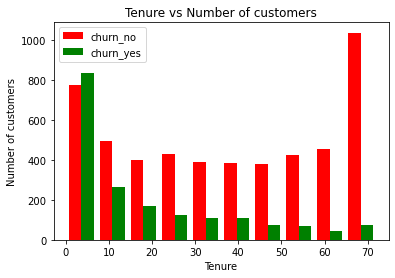

In [60]:
# Visualization of important features which effects the target feature
tenure_churn_no = data[data.Churn =='No'].tenure
tenure_churn_Yes = data[data.Churn =='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Tenure vs Number of customers')

plt.hist([tenure_churn_no, tenure_churn_Yes], color=['red', 'green'], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

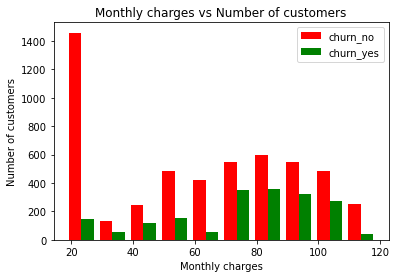

In [61]:
# Churn of customers with respective to monthly charges
mc_churn_no = data[data.Churn =='No'].MonthlyCharges
mc_churn_Yes = data[data.Churn =='Yes'].MonthlyCharges

plt.xlabel('Monthly charges')
plt.ylabel('Number of customers')
plt.title('Monthly charges vs Number of customers')

plt.hist([mc_churn_no, mc_churn_Yes], color=['red', 'green'], label=['churn_no', 'churn_yes'])
plt.legend()
plt.show()

In [62]:
# Unique values
def print_unique_values(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [63]:
print_unique_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [64]:
# replacing values
data.replace(to_replace='No phone service', value = 'No', inplace=True)
data.replace(to_replace='No internet service', value = 'No', inplace=True)

In [65]:
print_unique_values(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [66]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [67]:
# Feature encoding
for i in yes_no_columns:
    data[i].replace({'Yes':1, 'No':0}, inplace=True)

In [68]:
print_unique_values(data)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [70]:
for col in data:
    print(f'{col}: {data[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [72]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [73]:
# One-hot encoding
final_data = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
final_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [74]:
final_data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6290,1,0,1,0,71,1,1,0,0,0,0,1,1,1,93.7,6585.35,1,0,1,0,0,0,1,1,0,0,0
3349,1,0,1,0,11,1,1,0,0,1,0,1,1,1,99.5,1056.95,1,0,1,0,1,0,0,0,0,1,0
3628,0,0,0,0,9,1,0,1,0,1,1,1,0,1,69.5,653.25,0,1,0,0,1,0,0,0,0,0,1


In [75]:
scale_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [80]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

final_data[scale_columns] = scaler.fit_transform(final_data[scale_columns])

In [81]:
for col in final_data:
    print(f'{col}: {final_data[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: 

In [82]:
# Declaring independent and dependent features
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']

In [89]:
# Splitting data into training and testing tests
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
# Shape of the training data
X_train.shape

(5282, 26)

In [91]:
# Shape of the testing data
X_test.shape

(1761, 26)

In [92]:
# Importing tesnor flow library
import tensorflow as tf
from tensorflow import keras

In [94]:
# Model intitialization
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])


In [95]:
# Model training with training data
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
166/166 [==============================] - 4s 1ms/step - loss: 0.6200 - accuracy: 0.6448
Epoch 2/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7747
Epoch 3/10
166/166 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.7927
Epoch 4/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7976
Epoch 5/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7970
Epoch 6/10
166/166 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8014
Epoch 7/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8035
Epoch 8/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8005
Epoch 9/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8016
Epoch 10/10
166/166 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8031

In [96]:
# Model evaluation on testing data
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8103


[0.40927639603614807, 0.8103350400924683]

In [115]:
# Predictions on testing data
yp = model.predict(X_test)
yp[:5]

56/56 [==============================] - 0s 2ms/step


array([[0.7309008 ],
       [0.09338456],
       [0.00918591],
       [0.59087247],
       [0.01907397]], dtype=float32)

In [116]:
y_pred = []
for i in yp:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [118]:
y_pred[0:5]

[1, 0, 0, 1, 0]

In [119]:
y_test[:5]

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

In [125]:
# Classification report
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1282
           1       0.68      0.57      0.62       479

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.75      1761
weighted avg       0.80      0.81      0.80      1761



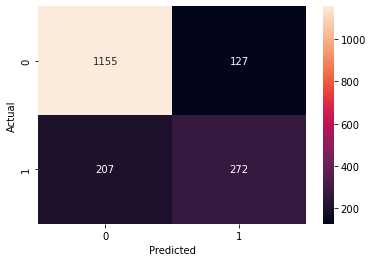

In [126]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [130]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =', round(accuracy, 2)*100)

Accuracy = 81.0
